# ATTO550, ATT0647N specs

* **ATTO550:** [home page](https://www.atto-tec.com/attotecshop/product_info.php?language=en&info=p103_ATTO-550.html&=), [spectra in xls](http://www.atto-tec.com/index.php?id=113&no_cache=1&L=1&tx_mmdamfilelist_pi1%5Bpointer%5D=2&cHash=b27a25c98e72f57bf6dcb0b1ba0ee370)

* **ATTO647N:** [home page](https://www.atto-tec.com/attotecshop/product_info.php?language=en&info=p114_atto-647n.html&=), [spectra in xls](http://www.atto-tec.com/index.php?id=113&no_cache=1&L=1&tx_mmdamfilelist_pi1%5Border%5D=tx_dam.title%3A0&cHash=7b9e266dd26ff5f317708c415d82556f)

In [1]:
atto550_ext_coeff = 1.2*1e5   # 1 / ( mol cm )
atto647N_ext_coeff = 1.5*1e5  # 1 / ( mol cm )

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
a550 = pd.read_excel('ATTO550.xlsx', 'Tabelle1', index_col=None, na_values=['NA'])
a647N = pd.read_excel('ATTO647N.xlsx', 'Tabelle1', index_col=None, na_values=['NA'])

In [4]:
a550[:4]

,Absorption,Unnamed: 1,Unnamed: 2,Emission,Unnamed: 4
0,"Wavelength, nm",Absorbance,NaN,"Wavelength, nm","Intensity, a.u."
1,NaN,NaN,NaN,NaN,NaN
2,250,0.324,NaN,520,0
3,250.2,0.325,NaN,521,0


In [5]:
a647N[:4]

,Absorption,Unnamed: 1,Unnamed: 2,Emission,Unnamed: 4
0,"Wavelength, nm",Absorbance,NaN,"Wavelength, nm","Intensity, a.u."
1,NaN,NaN,NaN,NaN,NaN
2,250,0.082,NaN,600,0.003
3,251,0.079,NaN,601,0.003


In [6]:
a550.columns = ['wl_absorption', 'absorption', 'none', 'wl_emission', 'emission']
ab_550 = a550[['wl_absorption', 'absorption']][2:].set_index('wl_absorption').dropna()
em_550 = a550[['wl_emission', 'emission']][2:].set_index('wl_emission').dropna()
atto550 = pd.concat([ab_550, em_550], axis=1)

a647N.columns = ['wl_absorption', 'absorption', 'none', 'wl_emission', 'emission']
ab_647N = a647N[['wl_absorption', 'absorption']][2:].set_index('wl_absorption').dropna()
em_647N = a647N[['wl_emission', 'emission']][2:].set_index('wl_emission').dropna()
atto647N = pd.concat([ab_647N, em_647N], axis=1)

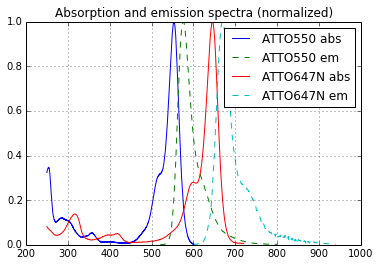

In [7]:
atto550.absorption.plot(label='ATTO550 abs')
atto550.emission.dropna().plot(style='--', ax=plt.gca(), label='ATTO550 em')
atto647N.absorption.plot(ax=plt.gca(), label='ATTO647N abs')
atto647N.emission.dropna().plot(style='--', ax=plt.gca(), label='ATTO647N em')
plt.legend()
plt.title('Absorption and emission spectra (normalized)');

To obtain the absorption cross-section we need to normalize by the extinctyion coefficient:

In [8]:
atto550.absorption *= atto550_ext_coeff
atto647N.absorption *= atto647N_ext_coeff

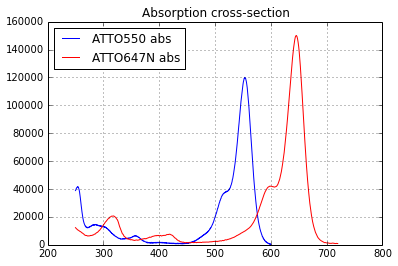

In [9]:
atto550.absorption.plot(label='ATTO550 abs', style='b')
atto647N.absorption.plot(ax=plt.gca(), label='ATTO647N abs', style='r')
plt.legend(loc='best')
plt.title('Absorption cross-section');

# Absorption cross-section @ 532 nm

In [10]:
atto550_abs532 = atto550.absorption.loc[532]
atto647N_abs532 = atto647N.absorption.loc[532]

atto550_abs532, atto647N_abs532

(47880.0, 5100.0)

In [11]:
ratio = atto647N_abs532 / atto550_abs532
ratio

0.10651629072681704

In [12]:
with open('../results/Dyes - ATT0647N-ATTO550 abs X-section ratio at 532nm.csv', 'w') as f:
    f.write(str(ratio))